In [1]:
import tensorflow as tf
import os
import shutil
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
file = "./CMS_Creative_164657191_Kingfisher.tfrecord"

for example in tf.python_io.tf_record_iterator(file):
    result = tf.train.Example.FromString(example)
    print(result)


features {
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\377\330\377\341\000\030Exif\000\000II*\000\010\000\000\000\000\000\000\000\000\000\000\000\377\354\000\021Ducky\000\001\000\004\000\000\000P\000\000\377\341\003ohttp://ns.adobe.com/xap/1.0/\000<?xpacket begin=\"\357\273\277\" id=\"W5M0MpCehiHzreSzNTczkc9d\"?> <x:xmpmeta xmlns:x=\"adobe:ns:meta/\" x:xmptk=\"Adobe XMP Core 5.3-c011 66.145661, 2012/02/06-14:56:27        \"> <rdf:RDF xmlns:rdf=\"http://www.w3.org/1999/02/22-rdf-syntax-ns#\"> <rdf:Description rdf:about=\"\" xmlns:xmpMM=\"http://ns.adobe.com/xap/1.0/mm/\" xmlns:stRef=\"http://ns.adobe.com/xap/1.0/sType/ResourceRef#\" xmlns:xmp=\"http://ns.adobe.com/xap/1.0/\" xmpMM:OriginalDocumentID=\"xmp.did:06801174072068118083F5E929E19C48\" xmpMM:DocumentID=\"xmp.did:648EC3BE1CEE11E59D81EDF11D09F35D\" xmpMM:InstanceID=\"xmp.iid:648EC3BD1CEE11E59D81EDF11D09F35D\" xmp:CreatorTool=\"Adobe Photoshop CS5 Macintosh\"> <xmpMM:DerivedFrom stRef:instan

In [3]:
from google.protobuf.json_format import MessageToJson

for example in tf.python_io.tf_record_iterator(file):
    jsonMessage = MessageToJson(tf.train.Example.FromString(example))
    print(jsonMessage)

{
  "features": {
    "feature": {
      "image/object/bbox/xmax": {
        "floatList": {}
      },
      "image/object/difficult": {
        "int64List": {}
      },
      "image/key/sha256": {
        "bytesList": {
          "value": [
            "VHFYRkNLWldibllrQlVQNC9yQnYxRmQzZStPVlNjUUJaRGF2Mm1YU013ND0="
          ]
        }
      },
      "image/width": {
        "int64List": {
          "value": [
            "1140"
          ]
        }
      },
      "image/object/truncated": {
        "int64List": {}
      },
      "image/format": {
        "bytesList": {
          "value": [
            "anBn"
          ]
        }
      },
      "image/object/class/label": {
        "int64List": {}
      },
      "image/height": {
        "int64List": {
          "value": [
            "550"
          ]
        }
      },
      "image/object/class/text": {
        "bytesList": {}
      },
      "image/source_id": {
        "bytesList": {
          "value": [
            "Q01TX0NyZWF0a

In [4]:
class TFRecordExtractor:
    def __init__(self, tfrecord_file):
        self.tfrecord_file = os.path.abspath(tfrecord_file)

    def _extract_fn(self, tfrecord):
        features = {
            'image/filename': tf.FixedLenFeature([], tf.string),
            'image/encoded': tf.FixedLenFeature([], tf.string),
            'image/width': tf.FixedLenFeature([], tf.int64),
            'image/height': tf.FixedLenFeature([], tf.int64)
        }

        sample = tf.parse_single_example(tfrecord, features)

        filename = sample['image/filename']
        image = sample['image/encoded']        
        width = sample['image/width']
        height = sample['image/height']
        return [filename, image, width, height]        

    def extract_image(self):
        dataset = tf.data.TFRecordDataset([self.tfrecord_file])
        dataset = dataset.map(self._extract_fn)
        iterator = dataset.make_one_shot_iterator()
        next_image_data = iterator.get_next()

        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())

            image_data = sess.run(next_image_data)
            name = image_data[0]
            image = image_data[1]
            width = image_data[2]
            height = image_data[3]
            return (name, width, height, image)

b'CMS_Creative_164657191_Kingfisher.jpg'
1140
550


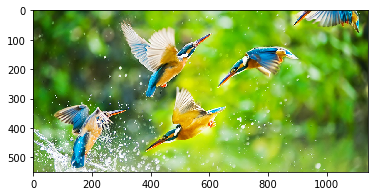

In [5]:
t = TFRecordExtractor(file)
(name, width, height, image) = t.extract_image()

print(name)
print(width)
print(height)
#print(imageFeatures.image)
image = Image.open(BytesIO(image))
plt.imshow(image)